In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/date-fruit-datasets")

print("Path to dataset files:", path)


c:\Users\lamia\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\lamia\.cache\kagglehub\datasets\muratkokludataset\date-fruit-datasets\versions\1


In [3]:
import os
os.listdir(path)

['Date_Fruit_Datasets']

In [4]:
inner_path = path + '/Date_Fruit_Datasets'
os.listdir(inner_path)

['Date_Fruit_Datasets.arff',
 'Date_Fruit_Datasets.xlsx',
 'Date_Fruit_Datasets_Citation_Request.txt']

In [5]:
!python -m pip install --upgrade pip

^C


In [ ]:
!python -m pip install --upgrade numpy pandas openpyxl

In [7]:
import pandas as pd


file_path = inner_path + '/Date_Fruit_Datasets.xlsx'

df = pd.read_excel(file_path)
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [8]:
missing_values = df.isnull().sum()  #حساب القيم المفقودة في كل عمود
print("=== Missing Values in Each Column ===") 
print(missing_values)  

=== Missing Values in Each Column ===
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist() # اختيار الأعمدة الرقمية فقط (int و float)


for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

categorical_cols = ['Class']


for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

   
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


df['Class'] = le.fit_transform(df['Class'])


print("Classes mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Classes mapping: {'BERHI': np.int64(0), 'DEGLET': np.int64(1), 'DOKOL': np.int64(2), 'IRAQI': np.int64(3), 'ROTANA': np.int64(4), 'SAFAVI': np.int64(5), 'SOGAY': np.int64(6)}


In [10]:
TARGET = 'Class'


FEATURE_COLS = [col for col in df.columns if col != TARGET]


X = df[FEATURE_COLS]


y = df[TARGET]


print("Features shape:", X.shape)


print("Target shape:", y.shape)


Features shape: (898, 34)
Target shape: (898,)


In [11]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20٪ للاختبار و 80٪ للتدريب
    random_state=42     # تثبيت العشوائية للحصول على نفس النتيجة كل مرة
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (718, 34) (718,)
Test set: (180, 34) (180,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

models = { 
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Baseline (Most Frequent)": DummyClassifier(strategy="most_frequent")
}

In [ ]:
pip install seaborn

c:\Users\lamia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


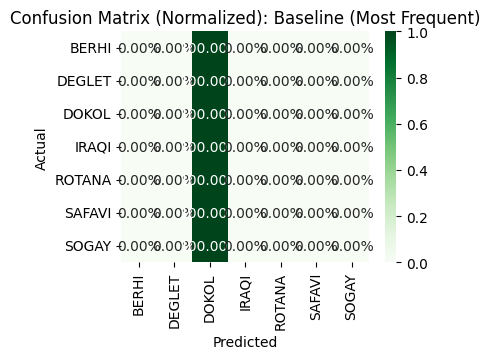

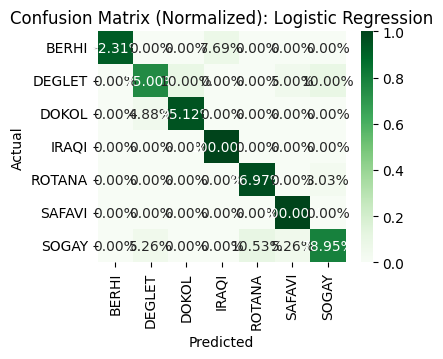

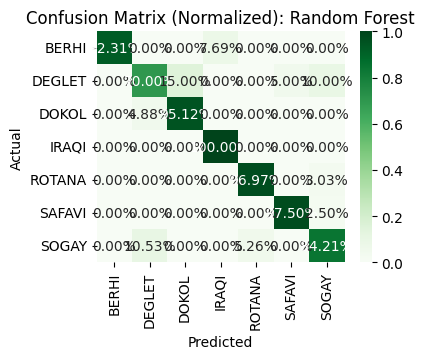

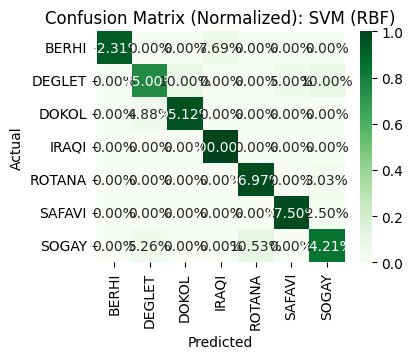

In [26]:
from sklearn.preprocessing import StandardScaler  
from sklearn.compose import ColumnTransformer     
from sklearn.pipeline import Pipeline             
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  
import matplotlib.pyplot as plt                  
import seaborn as sns                             

results = {} 

numeric_features = FEATURE_COLS  

for name, model in models.items():
    preprocessor = ColumnTransformer(
        transformers=[('num', StandardScaler(), numeric_features)],  
        remainder='passthrough'  
    )
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  
        ('classifier', model)           
    ])
    
    pipeline.fit(X_train, y_train)       # تدريب
    y_pred = pipeline.predict(X_test)    # توقع على بيانات الاختبار
    
    
    results[name] = {  
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }
    
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(4,3))               
    sns.heatmap(cm_norm,annot=True, fmt='.2%', cmap='Greens',
                xticklabels=le.classes_,
                yticklabels=le.classes_
                )
    plt.title(f'Confusion Matrix (Normalized): {name}') 
    plt.xlabel("Predicted",)                  
    plt.ylabel("Actual")                    
    plt.show()                            
   


In [28]:
pd.DataFrame(results)


,Baseline (Most Frequent),Logistic Regression,Random Forest,SVM (RBF)
Accuracy,0.227778,0.927778,0.922222,0.927778
Precision,0.051883,0.926226,0.921631,0.927734
Recall,0.227778,0.927778,0.922222,0.927778
F1 Score,0.084515,0.926327,0.921411,0.927216
